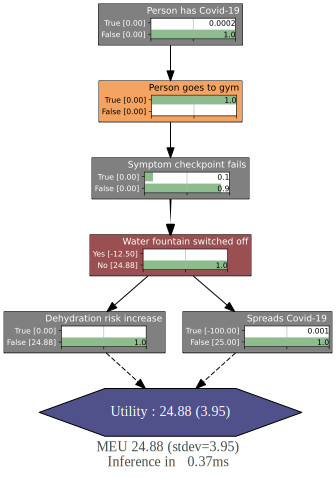

In [13]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn = gum.fastID("Person has Covid-19{True|False}->Person goes to gym{True|False}->Symptom checkpoint fails{True|False}->*Water fountain switched off{Yes|No}->Dehydration risk increase{True|False}->$Utility;*Water fountain switched off{Yes|No}->Spreads Covid-19{True|False}->$Utility")

bn.cpt("Person has Covid-19")[{}]=[0.00020494014,0.99979505986]

bn.cpt("Person goes to gym")[{"Person has Covid-19": "True"}]=[0.02395341426,0.97604658574] #assuming person will go to gym with Covid-19
bn.cpt("Person goes to gym")[{"Person has Covid-19": "False"}]=[0.02395341426,0.97604658574] #we shall assume that going to gym is independent of having Covide-19 (might be asymptomatic)

bn.cpt("Symptom checkpoint fails")[{"Person goes to gym": "True"}]=[0.10,0.90] #checkpoint failure not affected by Covid-19
bn.cpt("Symptom checkpoint fails")[{"Person goes to gym": "False"}]=[0.10,0.90] #assume independence (could be flu or hot weather etc)

bn.cpt("Spreads Covid-19")[{"Water fountain switched off": "No"}]=[0.001,0.999]
bn.cpt("Spreads Covid-19")[{"Water fountain switched off": "Yes"}]=[0.00,1.00] #impossible to spread Covid-19 at the fountain if they don't infect the fountain

bn.cpt("Dehydration risk increase")[{"Water fountain switched off": "Yes"}]=[0.75, 0.25]
bn.cpt("Dehydration risk increase")[{"Water fountain switched off": "No"}]=[0.00,1.00] #water fountain is on so no increase in dehydration risk

bn.utility("Utility")[{"Dehydration risk increase": "True"}]=-25 
bn.utility("Utility")[{"Dehydration risk increase": "False"}]=25 

bn.utility("Utility")[{"Spreads Covid-19": "True"}]=-100

gnb.showInference(bn,evs={"Person goes to gym":"True"}) #person goes to gym is required to get to the symptom checkpoint 
#gnb.showInference(bn,evs={"Person goes to gym":"True", "Water fountain switched off": "No"}) #toggle No and Yes to see difference in utility between having fountain access on vs off

